## Data analysis for COVID-19

Data extract from github https://github.com/CSSEGISandData/COVID-19.git provided by JHU(johns-hopkins-university) CSSE USA

Data is first loaded from local repository on my computer (check for last data update)

Convert data from raw dataframe table to a more workable dataframe (no coordinates and table trasposition: time as rows, country as columns)

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [159]:
# Load data from local repository
file_C = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv' # confirmed cases
file_D = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv' # death cases
file_R = 'CSSEGISandData_git/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv' # recover cases

# read csv files
df_c_raw = pd.read_csv(file_C)
df_d_raw = pd.read_csv(file_D)
df_r_raw = pd.read_csv(file_R)

### Recreate data frame as row dates and columns country - region (exclude coordinates)

In [160]:
# identify columns and datetime data
col_names = df_c_raw.columns
date_data = pd.to_datetime(df_c_raw.columns[4:])

In [161]:
# build columns header as country - province (if not empty)
region_col = pd.Series(data=df_c_raw['Province/State'], dtype='str')
country_col = pd.Series(data=df_c_raw['Country/Region'], dtype='str')
col_headers = country_col.str.cat(region_col, sep=(' - '))
col_headers = col_headers.str.rstrip(' nan').str.rstrip(' -')
col_headers.tail()

399       US - Socorro, NM
400    US - Bernalillo, NM
401       US - Oakland, MI
402         US - Wayne, MI
403    US - New Castle, DE
Name: Country/Region, dtype: object

In [162]:
# Build dataframe without coordinates and with time as row + countries as columns
df_c = pd.DataFrame(data=date_data, columns=['Date'])
for cidx, c in enumerate(col_headers):
    data_tmp = np.array(df_c_raw.iloc[cidx][4:], dtype=int)
    df_c[c] = data_tmp

## Global cases

Report of all confirmed cases in the world

In [163]:
# Calculate all confirmed cases from coronavirus in all countries
all_cases = np.array(df_c.sum(axis=1), dtype=int)
ac_series = pd.Series(data=all_cases, index=df_c.Date)

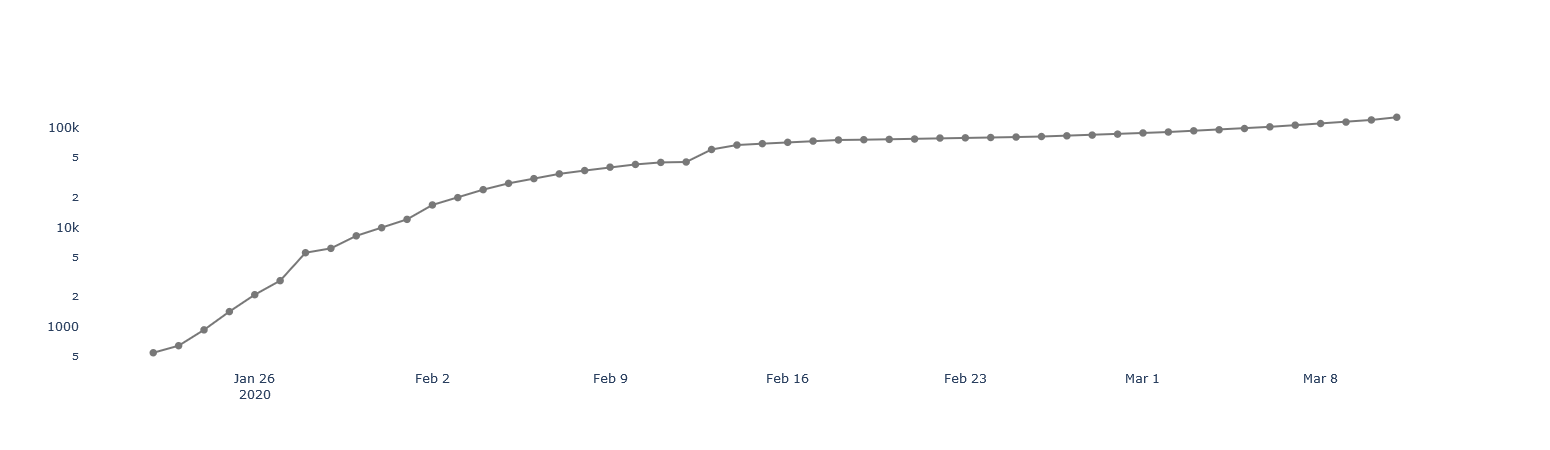

In [164]:
# plot graph
fig = go.Figure([go.Scatter(
    mode = 'lines+markers',
    x=ac_series.index, 
    y=ac_series, 
    marker=dict(color='rgb(120,120,120)', 
                line=dict(color='rgb(120,120,120)', width=1.5))
    )])
fig.update_layout(plot_bgcolor='white', yaxis_type="log")
fig.show()

## Study cases in France

Check the current status of diagnosed cases 

In [174]:
# check for data only in main land France (country & region with France as name)
c_study = 'France - France'
for cidx, c in enumerate(df_c.columns):
    # check if mainland
    if c == c_study:
        data_france = np.array(df_c[c])

In [175]:
# build a timeseries for france
ts_fr = pd.Series(data_france, index=df_c.Date)

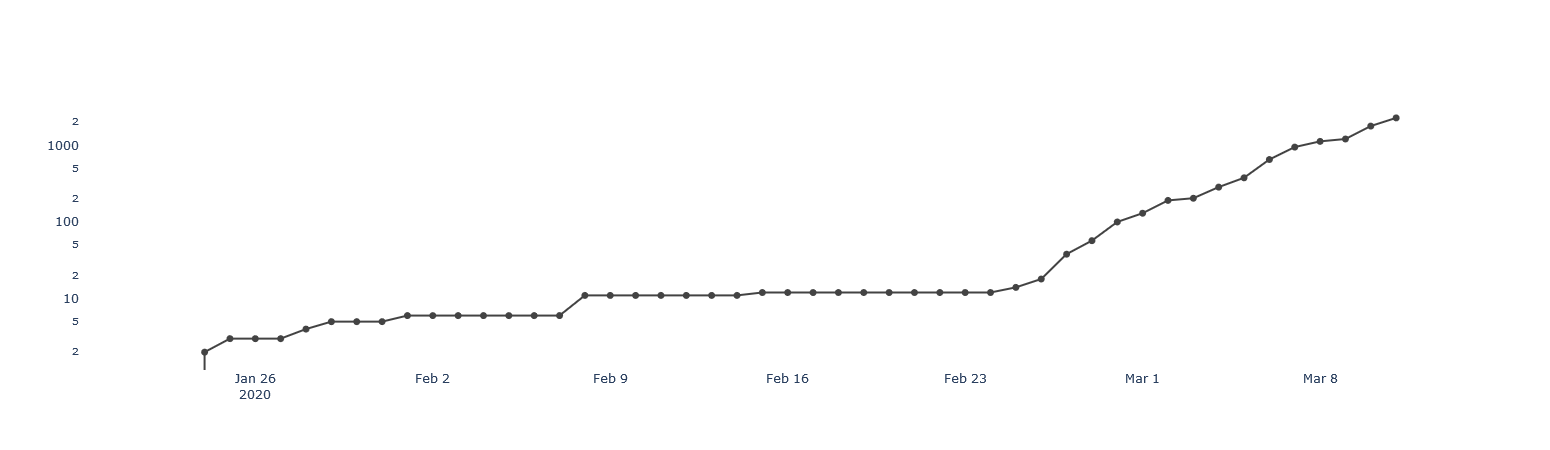

In [178]:
fig_go = go.Figure()
fig_go.add_trace(go.Scatter(
    mode='lines+markers',
    x=ts_fr.index, 
    y=ts_fr,  
    marker=dict(color='rgb(67,67,67)', size=7)
))
fig_go.update_layout(plot_bgcolor='white', yaxis_type="log")
fig_go.show()

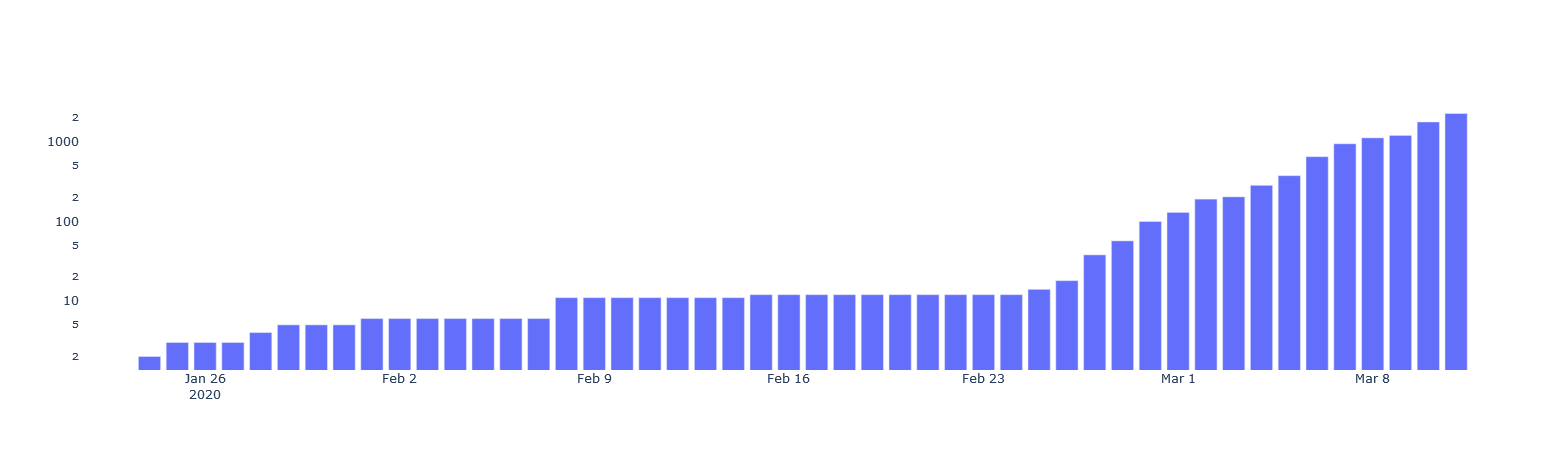

In [179]:
fig = go.Figure([go.Bar(
    x=ts_fr.index, 
    y=ts_fr, 
    )])
fig.update_layout(plot_bgcolor='white', yaxis_type="log")

fig.show()

### Study data from Italy

In [181]:
# check for data only in main land France (country & region with France as name)
c_study = 'Italy'
for cidx, c in enumerate(df_c.columns):
    # check for country match province 
    if c==c_study:
        data_italy = np.array(df_c[c])

In [182]:
# Create time series for Italy
ts_it = pd.Series(data_italy, index=df_c.Date)

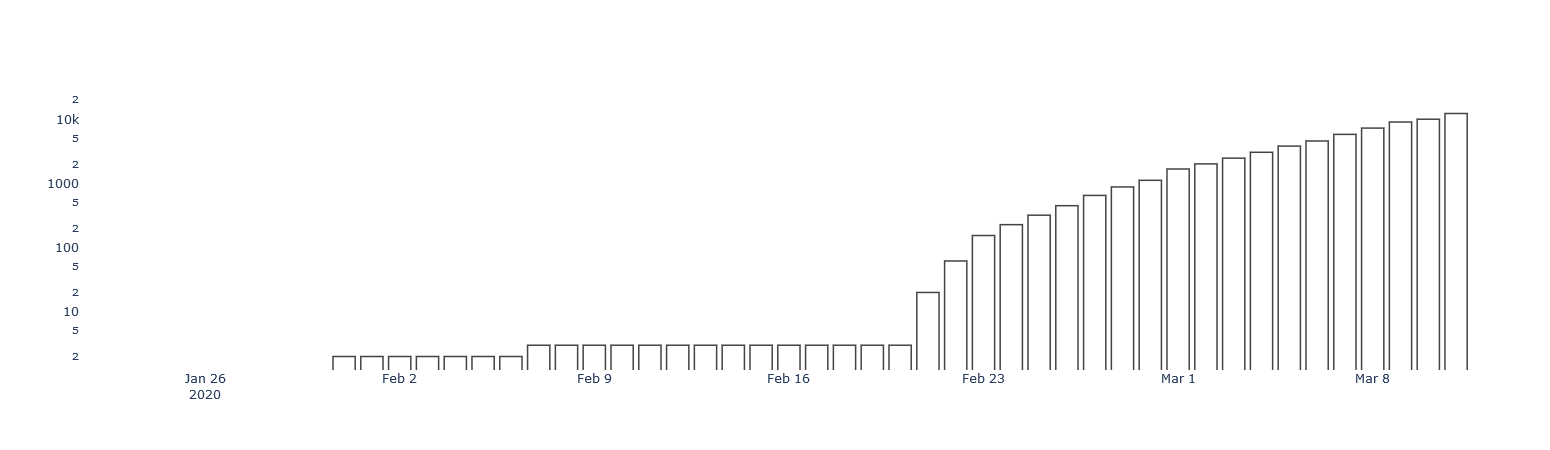

In [186]:
# Display data from Italy
fig = go.Figure([go.Bar(
    x=ts_it.index, 
    y=ts_it,
    marker=dict(color='rgb(255,255,255)', 
                line=dict(color='rgb(67,67,67)', width=1.5))
    )])
fig.update_layout(plot_bgcolor='white', yaxis_type="log")
fig.show()

## France vs Italy

Check the evolution of coronavirus in both countries

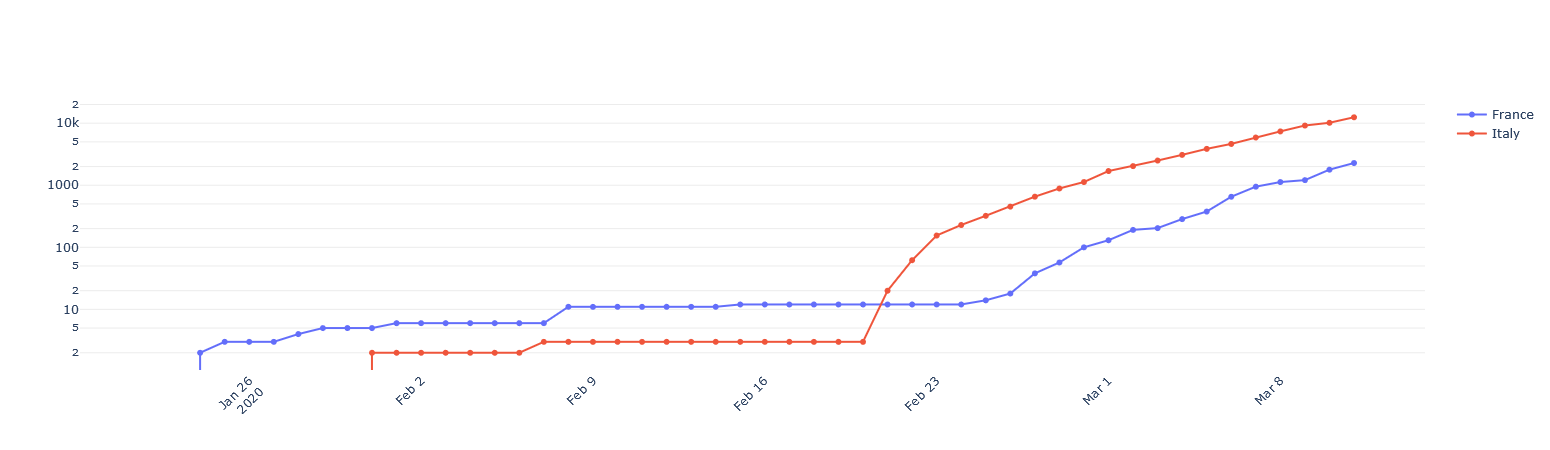

In [236]:
# Compare confirmed cases in France and Italy
axis_color = 'rgb(190,190,190)'

fig = go.Figure(data=[
    go.Scatter(name='France', x=ts_fr.index, y=ts_fr, mode='lines+markers'),
    go.Scatter(name='Italy', x=ts_it.index, y=ts_it, mode='lines+markers')
])
# change y axis grid options
fig.update_yaxes(
    showgrid=True, gridwidth=.3, gridcolor=axis_color
    # zeroline=True, zerolinewidth=.3, zerolinecolor=axis_color
)
# change x axis grid options
fig.update_layout(
    xaxis = dict(
        #tickformat = '%d/%m',
        tickmode = 'auto',
        tickangle = -45,
        #tickvals = df_c.Date

    ))
                     
# change background color, yaxis type and horizontal bar selector
fig.update_layout(plot_bgcolor='white', yaxis_type="log", xaxis_rangeslider_visible=False)

fig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')

fig.show()